# **Percepton for binary classification**

**Disclaimer**: large parts of the lab are taken from [this webpage](https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/).

A percepton is the simplest structure for a Neural Net. It consists in a _input layer_ and a one dimensional _output layer_. 
If the input layer has dimension $n$, as below,

<img src="https://drive.google.com/uc?id=1n3fIBXV9mIVzhEbwp3NHDE4Jebz-S-La"
 style="float:center;width:50px;height:50px;" align="center">


the Neural Net predicts the output as
$$
\sigma(w_0 + \sum_i^{n}w_i x_i).
$$

When dealing with a two-dimensional input as the following structure

<img src="https://drive.google.com/uc?id=14aPzXwSvvNn-uajJ2ZFfCNMlzeA69EVs"
 style="float:center;width:50px;height:50px;">
 
everything gets simple and the formula is
$$
\sigma(w_0 + w_1x_1 + w_2x_2).
$$

In case of binary classification, we can define $\sigma$ as

$$
\sigma = 
\begin{cases}
1 & \text{ if }  w_0 + w_1x_1 + w_2x_2 \geq 0, \\
0 & \text{ otherwise}.
\end{cases}
$$

Let us do that!



In [6]:
def predict(x, w, w0):
    sigma = w0 + x[0]*w[0] + x[1]*w[1]
    return 1.0 if sigma >= 0.0 else 0.0

Now we focus on the following ``dataset``. The first entry is the $x$ coordinate, the second the $y$ coordinate and the third entry is the classification tag.

We plot the data.

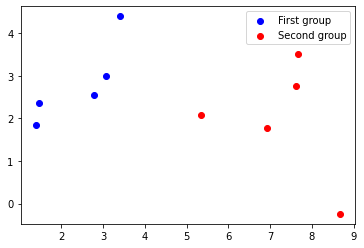

In [3]:
# ramdom data

dataset = [[2.7810836,2.550537003,0],
 [1.465489372,2.362125076,0],
 [3.396561688,4.400293529,0],
 [1.38807019,1.850220317,0],
 [3.06407232,3.005305973,0],
 [7.627531214,2.759262235,1],
 [5.332441248,2.088626775,1],
 [6.922596716,1.77106367,1],
 [8.675418651,-0.242068655,1],
 [7.673756466,3.508563011,1]]

# plotting data

import matplotlib.pyplot as plt
import numpy as np

x1 = []
y1 = []
x2 = []
y2 = []

for row in dataset:
    if row[-1] == 0:
        x1.append(row[0])
        y1.append(row[1])
    else:
        x2.append(row[0])
        y2.append(row[1])
    
plt.scatter(x1, y1, c ="blue", label="First group")
plt.scatter(x2, y2, c ="red",label="Second group")
plt.legend()

# To show the plot
plt.show()


# weights = [-0.1, 0.20653640140000007, -0.23418117710000003]  #### this are the ones related to the dataset

In [7]:
def train_weights(train, l_rate, n_epoch):
    input_dim = len(train[0]) - 1
    weights = [0.0 for i in range(input_dim)]
    bias = 0.0
    sum_error = 0.0
    for epoch in range(n_epoch):
        # sum_error = 0.0
        for x in train:
            prediction = predict(x, weights,bias)
            error = (x[-1] - prediction)
            sum_error += error**2
            bias = bias + l_rate * error
            for i in range(len(x)-1):
                weights[i] = weights[i] + l_rate * error * x[i]
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return bias, weights

In [8]:
# Calculate weights

l_rate = 0.1
n_epoch = 5
bias, weights = train_weights(dataset, l_rate, n_epoch)
print(weights)
print(bias)




>epoch=4, lrate=0.100, error=3.000
[0.20653640140000007, -0.23418117710000003]
-0.1


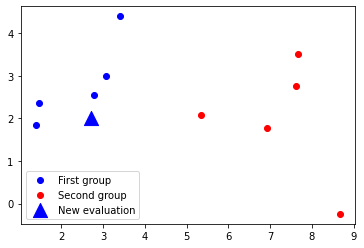

In [19]:
#### point ####
x = 2.7
y = 2.

prediction = predict([x,y],weights, bias)

if prediction == 1:
    color = "red"
else:
    color = "blue"
### plot the new point ####

plt.scatter(x1, y1, c = "blue", label="First group")
plt.scatter(x2, y2, c = "red",label="Second group")
plt.scatter(x, y, 200, c = color ,marker="^",label="New evaluation")
plt.legend()
 
# To show the plot
plt.show()